<a href="https://colab.research.google.com/github/Adamsongy/adam_test/blob/main/YOLOv4_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

首先我們先 Copy 一份 darknet 的 reop 到你的VM：

# **Step1: Download the darknet repository**

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15353, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15353 (delta 52), reused 49 (delta 48), pack-reused 15295
Receiving objects: 100% (15353/15353), 14.00 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (10323/10323), done.


下載完成後，我們需要修改 Makefile 裡面的四個參數，分別是:

*   GPU=0 要改成 GPU=1
*   OPENCV=0 要改成 ​OPENCV=1
*   CUDNN=0 要改成 CUDNN=1
*   CUDNN_HALF=0 要改成 ​CUDNN_HALF=1

我們可以透過以下代碼實現：

# **Step2: Modify the Makefile to have GPU and OpenCV enabled**

In [2]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN__HALF=1/' Makefile

/content/darknet


Makefile 修改完成後，我們就 make 指令來生成 darknet 這個深度學習引擎了。

# **Step3: Make darknet**

In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

在 make 完成後，其實 darknet 這套深度學習引擎就已經安裝完畢了，接下來我們會想要測試他是否能正常work，所以這時候我們就先去下載一些已經預先 train 好的 weights 檔做為測試用。

# **Step4: Download pretrained YOLOv3 and YOLOv4 weights**

YOLOv3 and YOLOv4 has been trainde already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 and YOLOv4 on these pretrained classes and get detections.

In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/darknet53.conv.74
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

--2021-11-14 08:23:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  61.0MB/s    in 4.2s    

2021-11-14 08:23:32 (57.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2021-11-14 08:23:32--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  55.9MB/s    in 2.8s    

2021-11-14 08:23:35 (55.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

--2021-

# **Step5:Run Object Detection with Darknet and YOLOv3/v4**

在 weights 下載好之後，我們就可以使用：
!./darknet detect (path of cfg file) (path of weights file) (path of picture)
這個指令進行預測，預測的結果會以 "predictions.jpg" 存在跟 darknet 同一個目錄底下，為了可以直接 show 在 notebook 上面，我們可以多寫一個 imShow 的 function 來實現。

In [7]:

#Define the show image function
def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

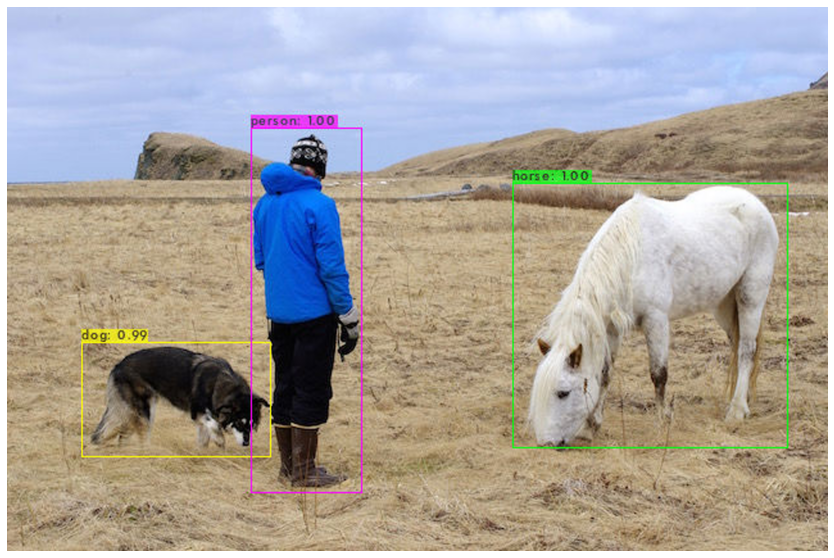

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x

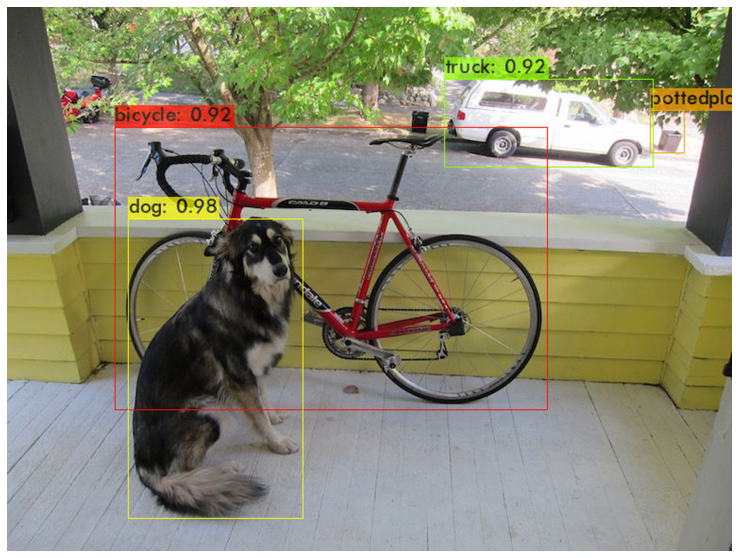

In [8]:
'''
5-1 Run detection with YOLOv3
'''

#run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
#show result
imshow('predictions.jpg')



'''
5-2 Run detection with YOLOv4
'''

#run darknet detection
!./darknet detect cfg/yolov4.cfg yolov4.weights data/dog.jpg
#show result
imshow('predictions.jpg')

基本上到這一步你已經在Google Colab 的 VM 上安裝好 darknet 這個深度學習引擎，
並擁有一個可以順利運行 YOLO 的環境了！
但是為了省去以後每次要在 Google Colab 上運行 YOLO 就要重複上面一系列操作來建環境的麻煩，
我們可以把現在建好的這個環境備份到 Google Drive 裡面，
以後要用再從 Google Drive 複製回 Google Colab 的 VM 就好了。

既然要把東西備份到 Google Drive，
那麼我們就先把你個 Google Drive 跟 Google Colab VM mount 在一起，
此時會需要你點擊它吐給你的連結，然後會跳出 Google File Stream 授權的畫面，
你需要同意授權，然後將授權碼複製以後貼回來給它。

# **Step6: Copy the completed darknet to Google Drive**

### 6-1.Mount to Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

!ln -s /content/gdrive/My\ Drive/space_for_YOLO/ /mydrive

Mounted at /content/gdrive


在把 Google Drive 與 Google Colab VM mount 在一起後，
我們就可以準備將 darknet 備份到你的 google drive 了，
為了節省傳輸的時間我們可以先把整個 darknet 資料夾壓縮起來，
再壓縮完成後就可用 cp 指令把它複製進 goole drive 囉~

### 6-2.Zip the whole darknet folder before copy it

In [10]:
%cd ..
!zip -r darknet.zip darknet

/content
  adding: darknet/ (stored 0%)
  adding: darknet/scripts/ (stored 0%)
  adding: darknet/scripts/voc_eval.py (deflated 67%)
  adding: darknet/scripts/kitti2yolo.py (deflated 61%)
  adding: darknet/scripts/get_imagenet_train.sh (deflated 44%)
  adding: darknet/scripts/voc_eval_py3.py (deflated 67%)
  adding: darknet/scripts/voc_label.py (deflated 60%)
  adding: darknet/scripts/setup.ps1 (deflated 55%)
  adding: darknet/scripts/imagenet_label.sh (deflated 38%)
  adding: darknet/scripts/log_parser/ (stored 0%)
  adding: darknet/scripts/log_parser/test_new.svg (deflated 66%)
  adding: darknet/scripts/log_parser/run_log_parser_windows.cmd (deflated 35%)
  adding: darknet/scripts/log_parser/test.log (deflated 82%)
  adding: darknet/scripts/log_parser/plot.jpg (deflated 33%)
  adding: darknet/scripts/log_parser/log_parser.py (deflated 64%)
  adding: darknet/scripts/log_parser/readme.md (deflated 45%)
  adding: darknet/scripts/log_parser/test_new.log (deflated 82%)
  adding: darknet/sc

### 6-3.Copy to Google Drive

In [11]:
!cp darknet.zip /mydrive/darknet.zip

# Done! Complete creating the run environment.

​這樣子就完成囉~ 以後要用的話一樣先把 google drive 與 google colab VM mount 在一起，然後再把 darknet.zip 從google drive 複製回 google colab VM 再解壓縮就好了！